Exercise 5.10

In [3]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
logRet = pd.read_csv("m_logret_10stocks.txt", delimiter = "\t")
capmRef = pd.read_csv("m_sp500ret_3mtcm.txt", delim_whitespace = True)

In [6]:
#Need to make sure each column has the same return type: "log montlhy returns"
capmRef['sp500'] = capmRef['sp500'].apply(lambda x: math.log(x+1))
capmRef['3mTCM'] = capmRef['3mTCM'].apply(lambda x: math.log((x/(100*12)) + 1))


In [7]:
capm = pd.concat([logRet, capmRef[['sp500', '3mTCM']]], axis = 1)
capm.head()

,Date,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL,sp500,3mTCM
0,1/3/1994,0.048913,0.135255,-0.022896,0.062311,-0.012589,0.089236,-0.004332,0.000000,0.023481,0.049109,0.013795,0.002480
1,2/1/1994,0.048849,-0.014934,-0.009507,0.020685,0.059586,-0.002166,-0.014386,-0.026850,-0.013543,0.010790,-0.013337,0.002705
2,3/1/1994,-0.040761,-0.078928,0.000873,0.162273,0.000000,-0.071433,-0.007948,0.014169,0.011634,-0.010790,-0.020546,0.002912
3,4/4/1994,-0.044394,0.041945,0.002175,-0.073436,-0.059586,-0.117886,0.002286,0.022294,0.038426,-0.031135,0.004967,0.003062
4,5/2/1994,-0.009572,0.031889,0.015763,0.010089,0.121734,-0.018289,0.003406,0.041424,0.064941,0.057625,0.005337,0.003444


In [8]:
capmAdjusted = capm
capmAdjusted = capmAdjusted.iloc[:, 1:12].subtract(capm['3mTCM'], axis = 'index')
capmAdjusted.head()

,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL,sp500
0,0.046433,0.132775,-0.025376,0.059831,-0.015069,0.086756,-0.006812,-0.002480,0.021001,0.046629,0.011315
1,0.046144,-0.017639,-0.012212,0.017980,0.056881,-0.004871,-0.017090,-0.029555,-0.016247,0.008086,-0.016042
2,-0.043673,-0.081841,-0.002039,0.159360,-0.002912,-0.074346,-0.010861,0.011257,0.008721,-0.013703,-0.023458
3,-0.047456,0.038883,-0.000887,-0.076498,-0.062648,-0.120948,-0.000776,0.019232,0.035364,-0.034197,0.001905
4,-0.013016,0.028445,0.012319,0.006645,0.118290,-0.021733,-0.000038,0.037979,0.061497,0.054181,0.001893


In [51]:
cutoffIdx = 54
period1Idx = range(0, cutoffIdx)
period2Idx = range(cutoffIdx, capmAdjusted.shape[0])
capmPeriod1 = capmAdjusted.iloc[period1Idx, :]
capmPeriod2 = capmAdjusted.iloc[period2Idx, :]

,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL,sp500
49,0.106489,0.055825,0.004660,0.061484,0.144086,0.063109,0.051994,0.020960,0.051002,0.019719,0.024905
50,0.061818,0.005328,0.043927,0.088045,-0.018059,0.022239,0.029767,-0.006520,0.019537,0.104019,0.016763
51,-0.006649,0.041249,-0.011266,-0.023993,0.072106,0.095534,-0.015286,0.043314,-0.000960,-0.090625,-0.000200
52,-0.015740,-0.102837,-0.026173,-0.156209,0.004573,-0.119892,-0.084210,0.002737,-0.030557,-0.043139,-0.012446
53,0.027904,0.022500,0.055595,-0.063531,0.047479,0.041037,-0.055163,-0.014200,0.102262,0.012086,0.012518


In [60]:
beta1 = [None]*(capmAdjusted.shape[1]-1)
beta2 = [None]*(capmAdjusted.shape[1]-1)
X1 = capmPeriod1['sp500'].to_numpy().reshape(-1,1)
X2 = capmPeriod2['sp500'].to_numpy().reshape(-1,1)
for idx in range(0, len(beta1)):
    y1 = capmPeriod1.iloc[:, idx].to_numpy().reshape(-1,1)
    y2 = capmPeriod2.iloc[:, idx].to_numpy().reshape(-1,1)
    model1 = sm.OLS(y1, sm.add_constant(X1))
    model2 = sm.OLS(y2, sm.add_constant(X2))
    beta1[idx] = model1.fit()
    beta2[idx] = model2.fit()

In [63]:
print(beta1[1].params)
print(beta2[1].params)

[-0.00217437  1.25695313]
[0.00931438 1.65027584]


In [62]:
diffBeta = list()
for i, j in zip(beta1, beta2):
    diffBeta.append(abs((j.params[1] - i.params[1])/i.params[1]))
    
print(*diffBeta, sep=' % \n')

1.8088115333080563 % 
0.3129175602473369 % 
0.4527453275162159 % 
2.265497640585106 % 
0.10353155409252508 % 
0.8518844542942016 % 
0.182481830487025 % 
0.21896509018907453 % 
0.17421422588942279 % 
0.8944908487219605


As we can see, the Beta's all appear to differ by at least 10% percent and at most 226%, and note that all of the beta's appear to increase from time period1 to time period2.

In [64]:
#Now lets try to estimate beta as a dynamic linear model, first lets create our subroutine 
#computing Kalman Filter values and estimates
def singleKalmanFilter(beta0, betaVariance, stockObs, marketObs, obsVariance):
    n = len(marketObs)
    dynamicBeta = [None]*n
    
    priorVariance_i = betaVariance
    priorBeta_i = beta0
    
    for i in range(0, n):
        K_i = computeKalman(obsVariance, priorVariance_i, marketObs.iloc[i])
        posteriorBeta = updatePriorBeta(priorBeta_i, K_i, marketObs.iloc[i], stockObs.iloc[i])
        posteriorVar_i = updatePriorVar(K_i, priorVariance_i, marketObs.iloc[i], obsVariance)
        
        priorBeta_i = posteriorBeta
        priorVariance_i = posteriorVar_i
        
        dynamicBeta[i] = priorBeta_i
        
    return dynamicBeta


In [65]:
def computeKalman(obsVariance, priorVariance_i, marketObs):
    retval = priorVariance_i * marketObs
    retval /= (obsVariance + (priorVariance_i*(marketObs**2)))
    return retval
    
def updatePriorBeta(priorBeta_i, K_i, marketObs, stockObs):
    retval = priorBeta_i + K_i*(stockObs - priorBeta_i*marketObs)
    return retval
    
def updatePriorVar(K_i, priorVariance_i, marketObs, obsVariance):
    retval = ((1-K_i*marketObs)**2)*priorVariance_i
    retval += (1+K_i**2)*obsVariance
    return retval

In [66]:
#Lets Try it out on one of the stocks, AAPL
estimatedBeta = beta1[0].params[1]
estimatedBetaVar = beta1[0].bse[1]
obsVariance = 0.2
stockObs = capmPeriod2['AAPL']
marketObs = capmPeriod2['sp500']

dynamicBetaAAPL = singleKalmanFilter(estimatedBeta, estimatedBetaVar, stockObs,
                                    marketObs, obsVariance)


Text(0, 0.5, 'Dynamic Beta')

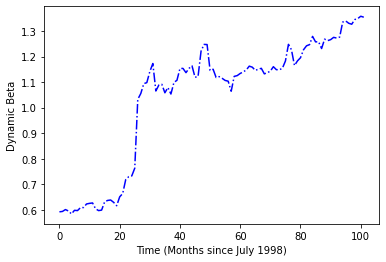

In [74]:
plt.plot(dynamicBetaAAPL, 'b-.')
plt.xlabel("Time (Months since July 1998)")
plt.ylabel("Dynamic Beta")

In [70]:
dynamicBetaList = [None]*(capmPeriod2.shape[1]-1)
for idx, i in enumerate(dynamicBetaList):
    estimatedBeta = beta1[idx].params[1]
    estimatedBetaVar = beta1[idx].bse[1]
    dynamicBetaList[idx] = singleKalmanFilter(estimatedBeta, estimatedBetaVar,
                                              capmPeriod2.iloc[:,idx], 
                                              capmPeriod2.iloc[:,-1], obsVariance)
    

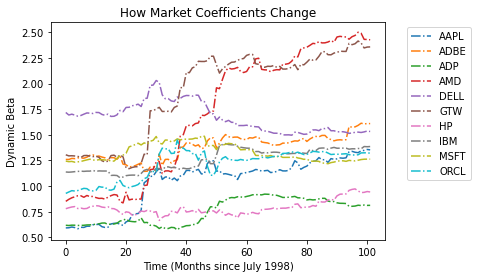

In [78]:
names = capmPeriod2.iloc[:, 0:-1].columns

plt.xlabel("Time (Months since July 1998)")
plt.ylabel("Dynamic Beta")
plt.title("How Market Coefficients Change")
for i in range(0, len(dynamicBetaList)):
    plt.plot(dynamicBetaList[i], '-.')
plt.legend(names, bbox_to_anchor=(1.05,1))
plt.show()